### UBER ANAYSICS


In [20]:
#  Import libs 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans 

In [2]:
# import data

path = "C:/Users/PAUL/Desktop/Programs/Python/Machine_Learning/Projects/uber_data.csv"
data = pd.read_csv(path, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

data.head(3)
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

## Cleaning & Info

In [3]:
# Cleaning data 
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)


In [4]:
# Setting the data columns
data['date'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [5]:
# Show some properties
f'Data Shape {data.shape}'
print('Data Info',data.info())
data.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               99999 non-null  int64         
 1   tpep_pickup_datetime   99999 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  99999 non-null  datetime64[ns]
 3   passenger_count        99999 non-null  int64         
 4   trip_distance          99999 non-null  float64       
 5   pickup_longitude       99999 non-null  float64       
 6   pickup_latitude        99999 non-null  float64       
 7   RatecodeID             99999 non-null  int64         
 8   store_and_fwd_flag     99999 non-null  object        
 9   dropoff_longitude      99999 non-null  float64       
 10  dropoff_latitude       99999 non-null  float64       
 11  payment_type           99999 non-null  int64         
 12  fare_amount            99999 non-null  float64       
 13  e

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
date                     datetime64[ns]
dtype: object

## Features Engineering


Date( hour, day, week, month, year )

In [6]:
# Spilting the data  year and days
data['hour'] = data['date'].dt.hour 
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data.head(3)

C:\Users\PAUL\AppData\Local\Temp\ipykernel_11324\426761632.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['date'].dt.week


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,hour,day,week,month,year
0,1,2016-03-01,2016-03-01 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,2.05,0.00,0.3,12.35,2016-03-01,0,1,9,3,2016
2,2,2016-03-01,2016-03-01 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,8.00,0.00,0.3,63.80,2016-03-01,0,1,9,3,2016
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,3.78,5.54,0.3,41.62,2016-03-01,0,1,9,3,2016


Surgue Mutlipler

In [7]:
# Creating the Surgue mutlipler
data['base_fare'] = data['total_amount'].values + data['extra'].values + data['mta_tax'].values + data['improvement_surcharge'].values
data['total_fare'] = data['total_amount'].values + data['extra'].values + data['mta_tax'].values + data['tip_amount'].values + data['tolls_amount'].values + data['improvement_surcharge'].values

data['Surge_multiplier'] = data['total_fare']  / data['base_fare']
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,total_amount,date,hour,day,week,month,year,base_fare,total_fare,Surge_multiplier
0,1,2016-03-01,2016-03-01 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,12.35,2016-03-01,0,1,9,3,2016,13.65,15.70,1.150183
2,2,2016-03-01,2016-03-01 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,63.80,2016-03-01,0,1,9,3,2016,65.10,73.10,1.122888
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,41.62,2016-03-01,0,1,9,3,2016,42.42,51.74,1.219708
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,113.80,2016-03-01,0,1,9,3,2016,114.10,129.60,1.135846
5,2,2016-03-01,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,...,30.36,2016-03-01,0,1,9,3,2016,32.16,37.22,1.157338


Driver Profit 

In [8]:
# Driver profit
data['Driver_Profit'] = data['total_amount'].values - data['extra'].values - data['mta_tax'].values - data['improvement_surcharge'].values -data['tolls_amount'].values + data['tip_amount'].values
pay_ava = data['Driver_Profit'].mean()
print('The avarage pay driver: ', pay_ava)
data

The avarage pay driver:  16.997645376453768


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,date,hour,day,week,month,year,base_fare,total_fare,Surge_multiplier,Driver_Profit
0,1,2016-03-01 00:00:00,2016-03-01 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,2016-03-01 00:00:00,0,1,9,3,2016,13.65,15.70,1.150183,13.10
2,2,2016-03-01 00:00:00,2016-03-01 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,2016-03-01 00:00:00,0,1,9,3,2016,65.10,73.10,1.122888,70.50
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,2016-03-01 00:00:00,0,1,9,3,2016,42.42,51.74,1.219708,39.06
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,2016-03-01 00:00:00,0,1,9,3,2016,114.10,129.60,1.135846,98.00
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,...,2016-03-01 00:00:00,0,1,9,3,2016,32.16,37.22,1.157338,33.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2016-03-01 06:17:00,2016-03-01 06:22:00,1,0.50,-73.990898,40.750519,1,N,-73.998245,...,2016-03-01 06:17:00,6,1,9,3,2016,6.60,6.60,1.000000,5.00
99996,1,2016-03-01 06:17:00,2016-03-01 06:32:00,1,3.40,-74.014488,40.718296,1,N,-73.982361,...,2016-03-01 06:17:00,6,1,9,3,2016,17.60,19.60,1.113636,18.00
99997,1,2016-03-01 06:17:00,2016-03-01 06:37:00,1,9.70,-73.963379,40.774097,1,N,-73.865028,...,2016-03-01 06:17:00,6,1,9,3,2016,44.94,59.28,1.319092,46.60
99998,2,2016-03-01 06:17:00,2016-03-01 06:22:00,1,0.92,-73.984901,40.763111,1,N,-73.970696,...,2016-03-01 06:17:00,6,1,9,3,2016,9.46,10.82,1.143763,8.22


## Prediction

Demand by Hour

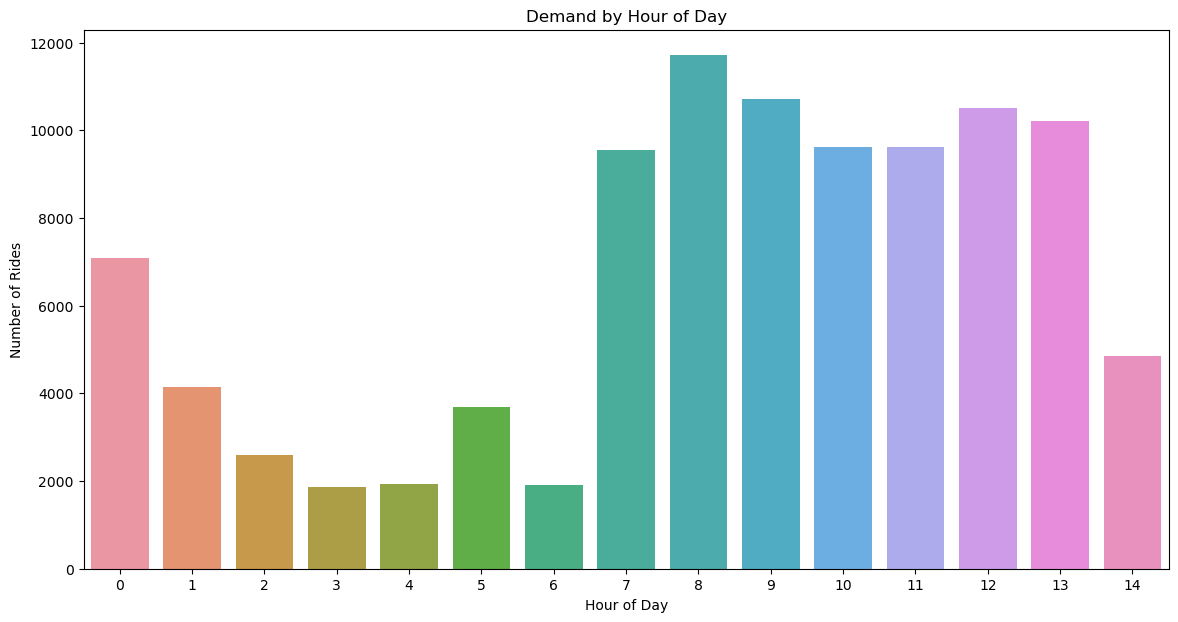

In [9]:
plt.figure(figsize= (14, 7))
sns.countplot(x='hour', data= data)
plt.title('Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()


Demand By Week

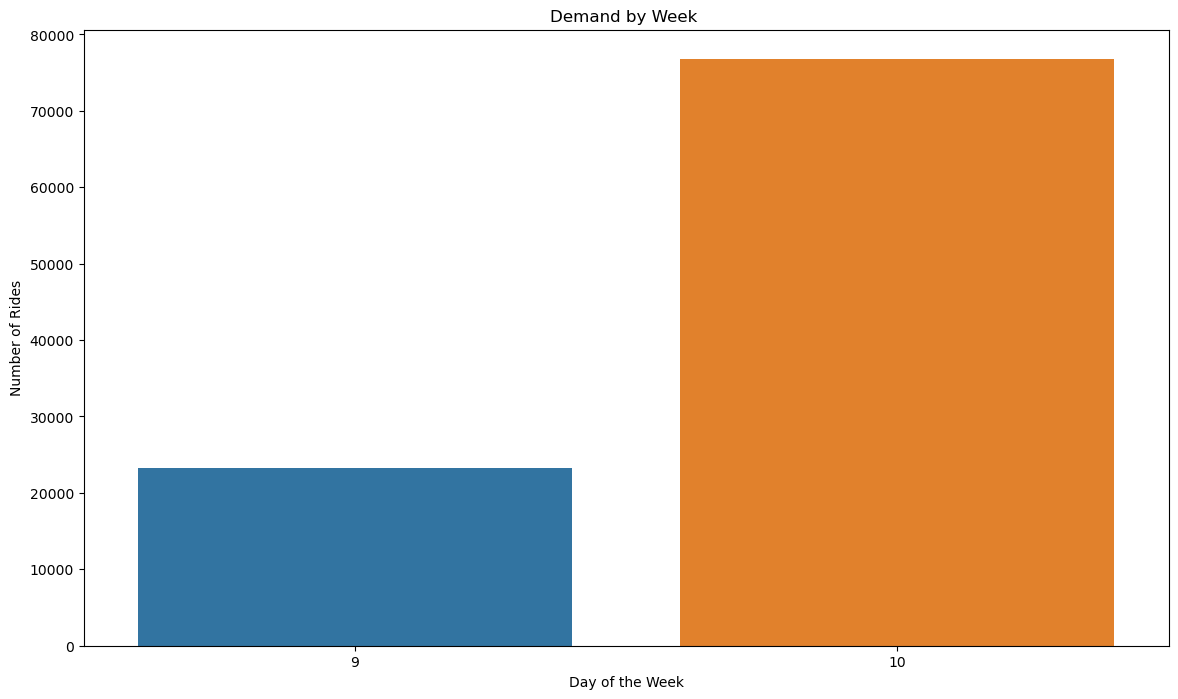

In [10]:
plt.figure(figsize= (14,8))
sns.countplot(x='week', data=data)
plt.title('Demand by Week ')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


SURGUE PRICING 

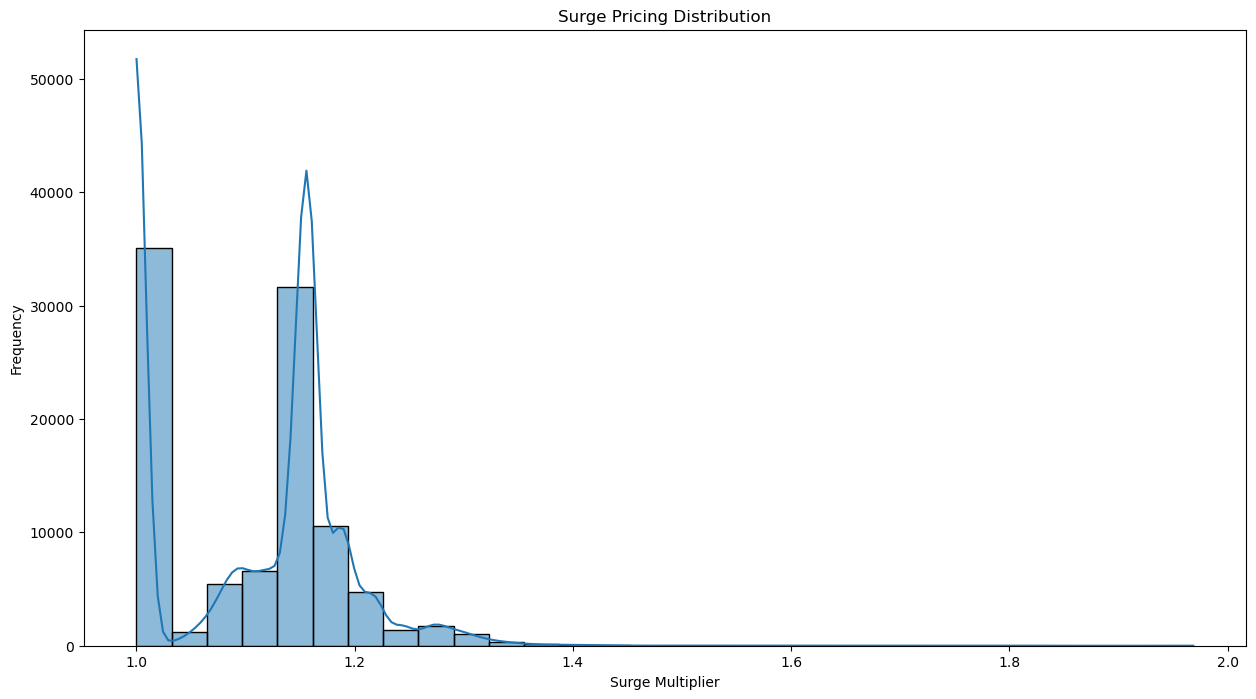

In [11]:
plt.figure(figsize=(15, 8))
sns.histplot(data['Surge_multiplier'], bins = 30, kde=True)
plt.title('Surge Pricing Distribution')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.show()

Surge(In price) By Hours of the day 

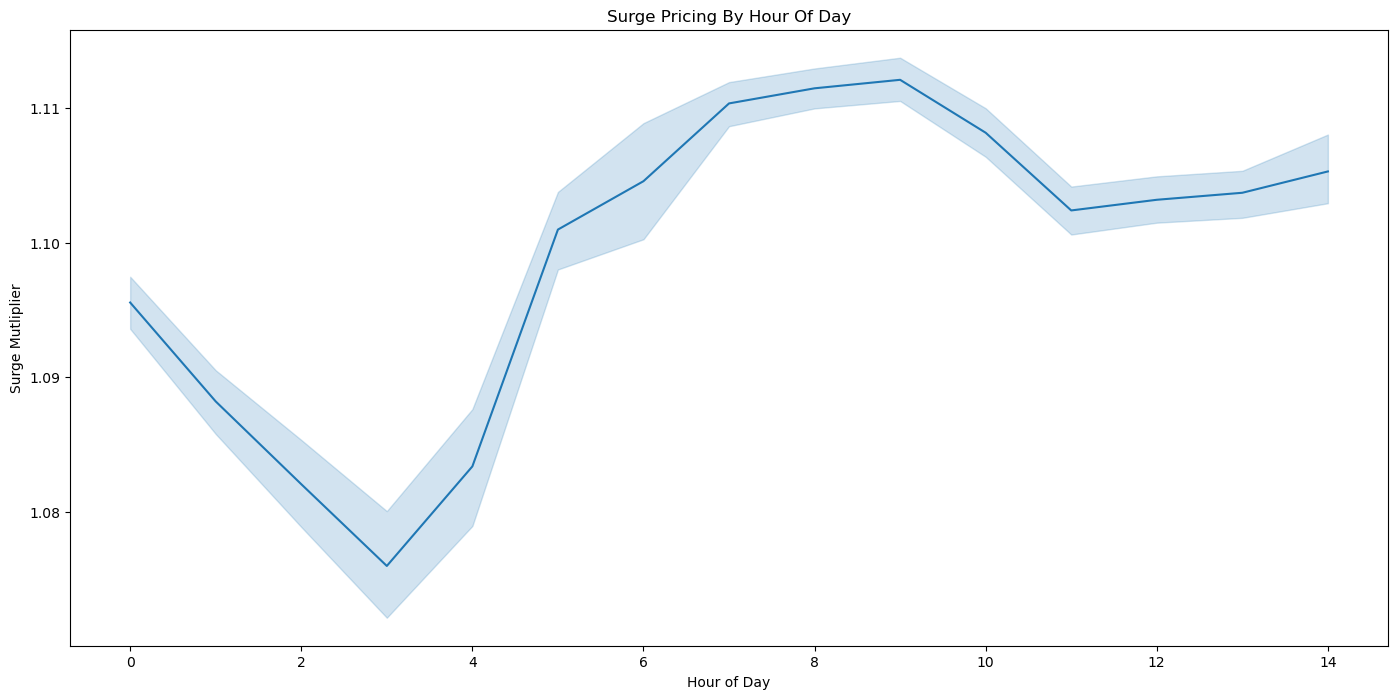

In [12]:
plt.figure(figsize=(17, 8))
sns.lineplot(x='hour', y='Surge_multiplier', data=data)
plt.title('Surge Pricing By Hour Of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Surge Mutliplier')
plt.show()

Factors affecting driver ratings


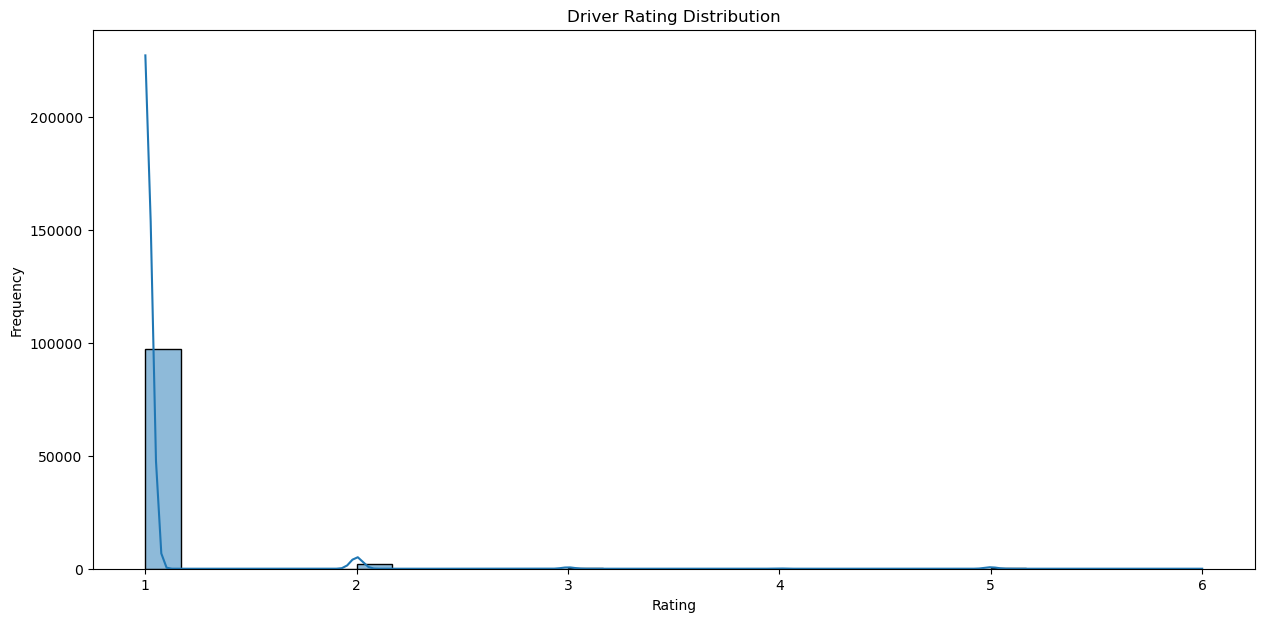

In [13]:
plt.figure(figsize=(15,7))
sns.histplot(data['RatecodeID'], bins=30, kde=True)
plt.title('Driver Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()  

C:\Users\PAUL\AppData\Local\Temp\ipykernel_11324\1346339174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


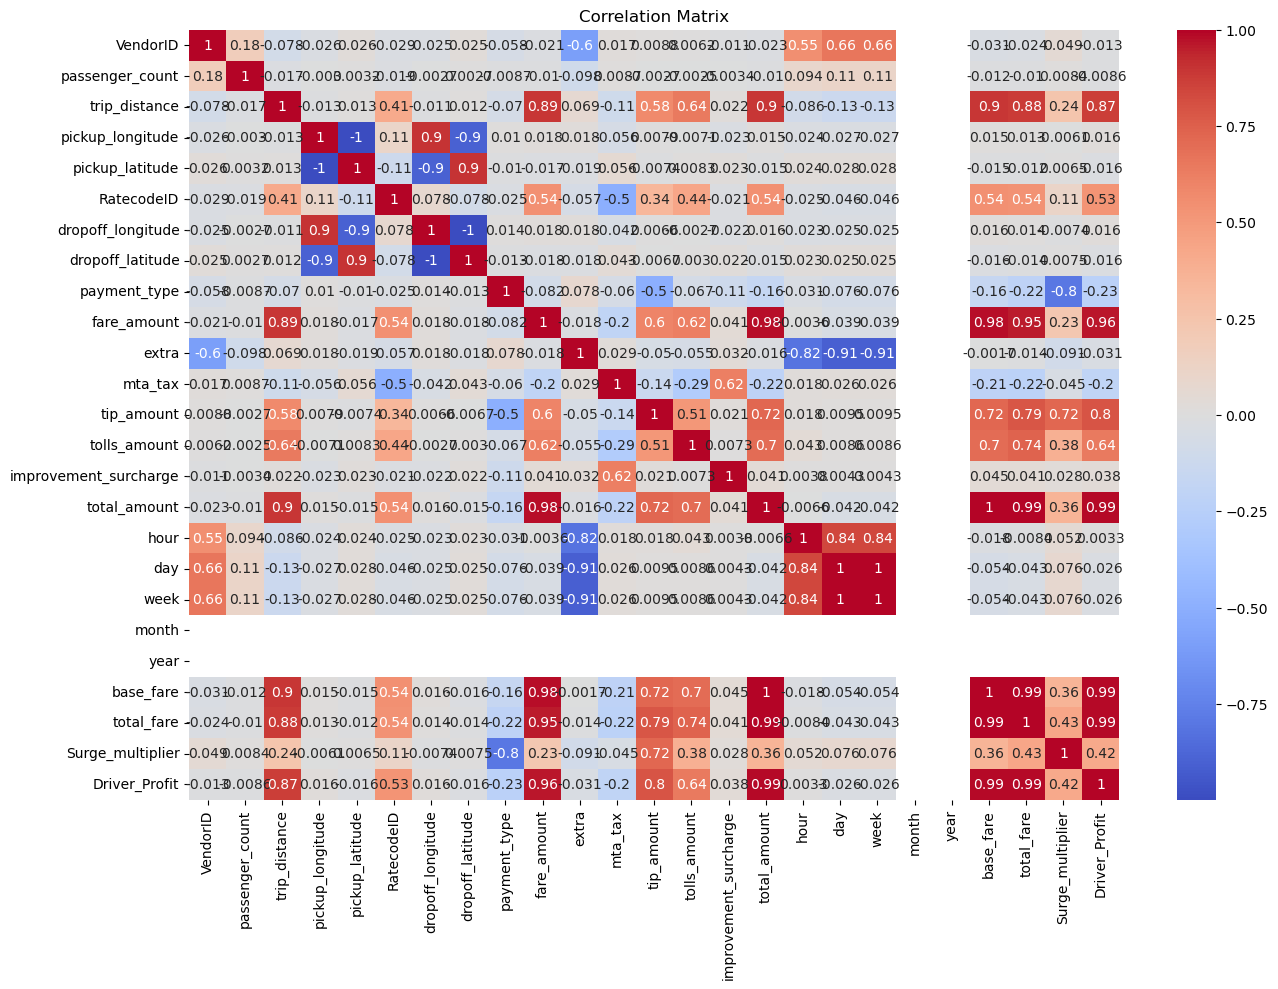

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## The result show that hihger rating come with distance and its 

GEOSPATIAL ANALYSIS

In [15]:
geometry = [Point(xy) for xy in zip(data['pickup_longitude'], data['pickup_latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)
geo_df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,hour,day,week,month,year,base_fare,total_fare,Surge_multiplier,Driver_Profit,geometry
0,1,2016-03-01,2016-03-01 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,0,1,9,3,2016,13.65,15.70,1.150183,13.10,POINT (-73.97675 40.76515)
2,2,2016-03-01,2016-03-01 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,0,1,9,3,2016,65.10,73.10,1.122888,70.50,POINT (-73.78202 40.64481)
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,0,1,9,3,2016,42.42,51.74,1.219708,39.06,POINT (-73.86342 40.76981)


C:\Users\PAUL\AppData\Local\Temp\ipykernel_11324\3219079288.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


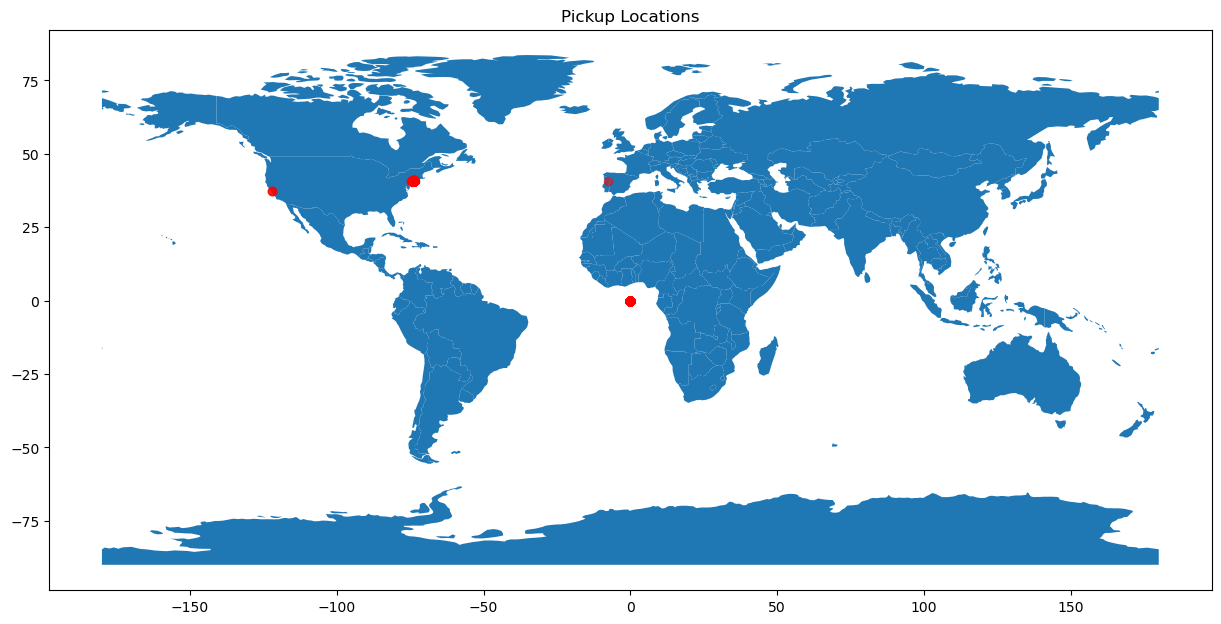

In [16]:
# Plotting for the location 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 8))
geo_df.plot(ax=ax,  color='red', alpha=0.5)
plt.title('Pickup Locations')
plt.show()

DEMAND 

In [18]:
# plt.figure(figsize=(15,8))
# sns.kdeplot(x= data['pickup_longitude'], y= data['pickup_latitude'], cmap='Reds', shade=True, bw_adjust=0.5)
# plt.title('Heatmap of Pickup Locations')
# plt.show()

CUSTOMER SEGMENTATION 

C:\Users\PAUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PAUL\AppData\Local\Temp\ipykernel_11324\3209326451.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='fare_amount', y= 'passenger_count' ,data=data,palette=


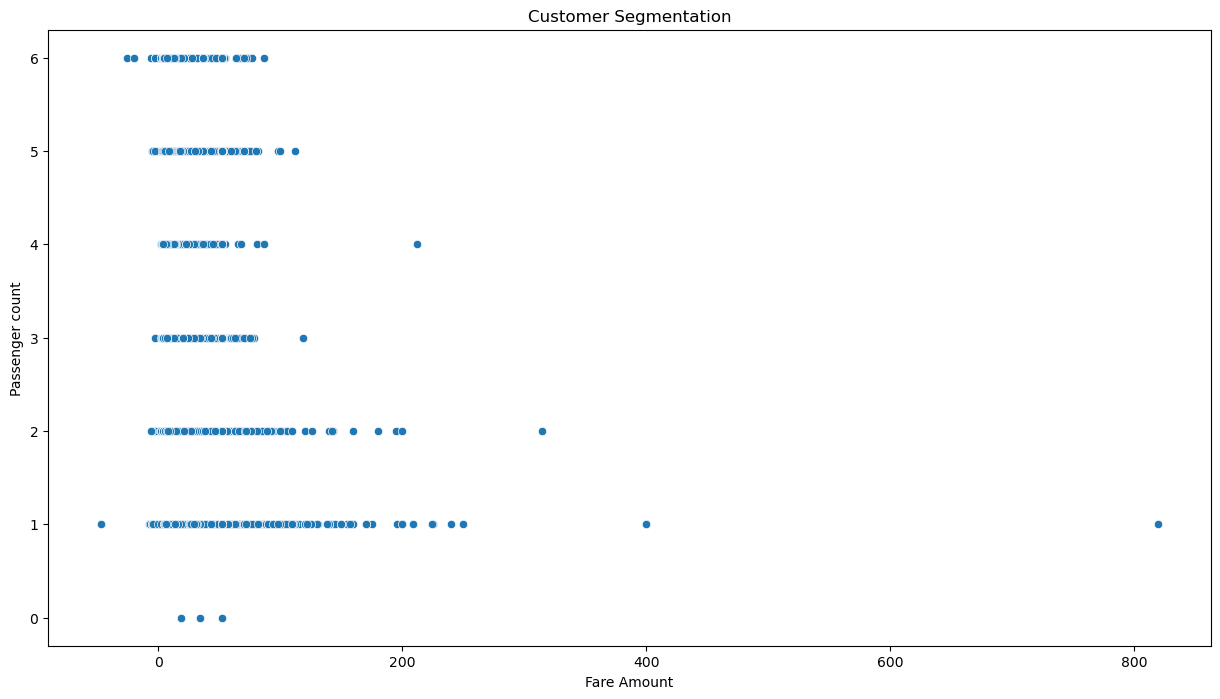

In [31]:
# Getting relevent feartures for clustering  ( lib used:KMeans )
features = data[['fare_amount', 'passenger_count', 'hour', 'week']]
features.dropna()

kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
data['Cluster'] = kmeans.labels_


# Ploting the graph for it 
plt.figure(figsize=(15,8))
sns.scatterplot(x='fare_amount', y= 'passenger_count' ,data=data,palette=
               'Set1')
plt.title('Customer Segmentation')
plt.xlabel('Fare Amount')
plt.ylabel('Passenger count')
plt.show()


# THis shows that the cost fare is high when its a single passenger 

RIDE DISTANCE AND DURATION

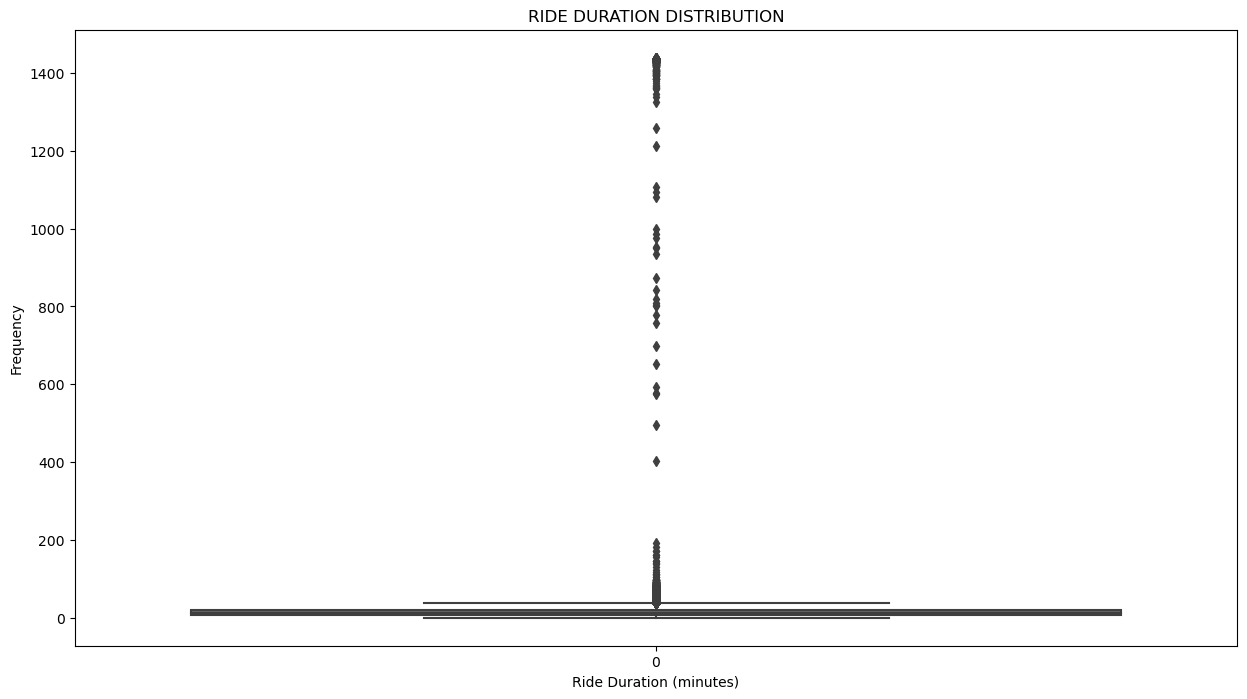

In [49]:
data['ride_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
Ride_Time = data['ride_duration']

# Plotting 
plt.figure(figsize=(15,8))
sns.boxplot(Ride_Time)
plt.title('RIDE DURATION DISTRIBUTION')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

    RIDE DURATION BY HOUR

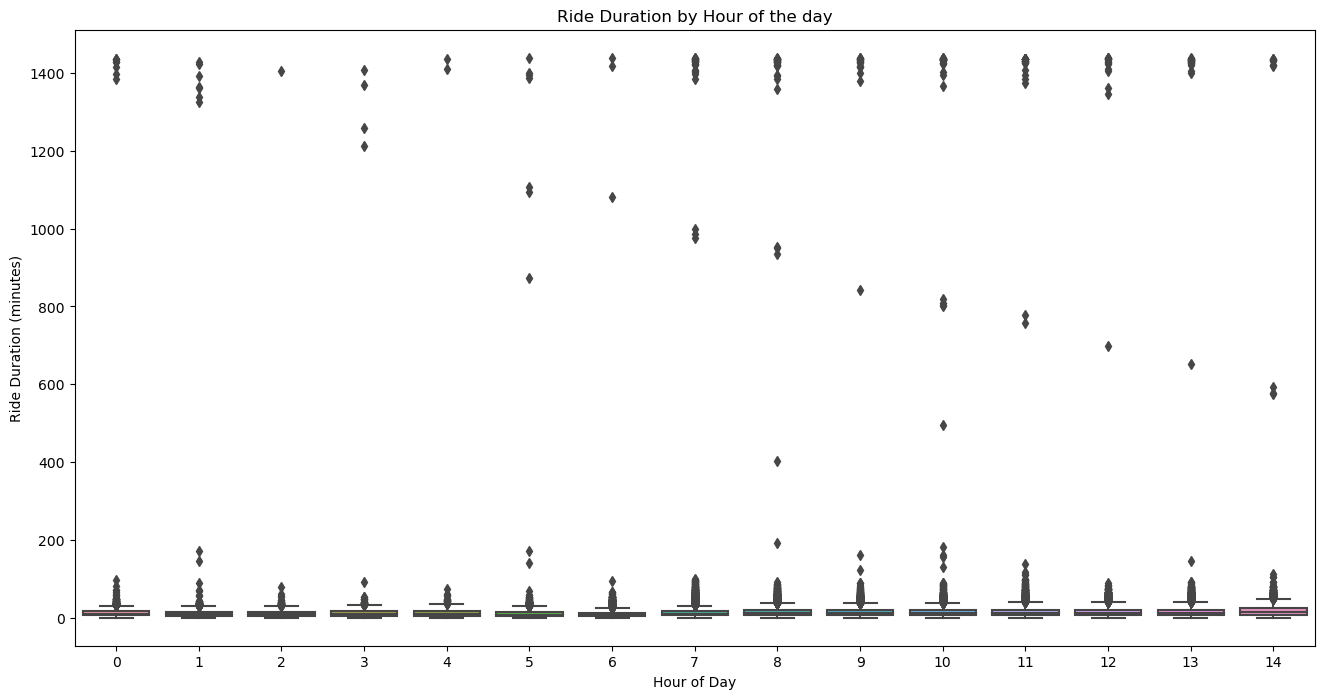

In [48]:
plt.figure(figsize=(16,8))
sns.boxplot(x='hour', y= 'ride_duration', data=data)
plt.title('Ride Duration by Hour of the day')
plt.xlabel('Hour of Day')
plt.ylabel('Ride Duration (minutes)')
plt.show()